In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_csv('zomato_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.shape

(51717, 17)

In [6]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def remove_unwanted(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value= value[0]
        return float(value)
    

In [11]:
df['rate']=df['rate'].apply(remove_unwanted)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [12]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
df.rate.isnull().sum()

10019

In [15]:
df['rate']=df['rate'].fillna(df['rate'].mean())

In [16]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70014186, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [17]:
df.rate.isnull().sum()

0

In [18]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [20]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [21]:
df.shape

(51042, 11)

In [22]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type'},inplace=True)

In [23]:
df=df.drop(['listed_in(city)'],axis=1)

In [24]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [25]:
df.Cost2plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [26]:
def handlecomma(value):
    
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
                

In [27]:
df['Cost2plates']=df['Cost2plates'].apply(handlecomma)           

In [28]:
df.Cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [30]:
rest_types=df.rest_type.value_counts()
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [31]:
rest_type_lessthan1000 = rest_types[rest_types<1000]
rest_type_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [32]:
def handle_rest_type(value):
    if(value in rest_type_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type']=df['rest_type'].apply(handle_rest_type)   

In [33]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [34]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [35]:
df.location.value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [36]:
location=df['location'].value_counts()

In [37]:
location_lessthan300 = location[location<300]

In [38]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

In [39]:
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [40]:
cuisines=df.cuisines.value_counts()

In [41]:
df_cuisineslessthan300 = cuisines[cuisines<300]

In [42]:
def handle_cuisines(value):
    if(value in df_cuisineslessthan300):
        return 'others'
    else:
        return value

In [43]:
df['cuisines']=df['cuisines'].apply(handle_cuisines)

In [44]:
df.cuisines.value_counts()

others                                 35170
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 754
Cafe                                     725
South Indian, North Indian, Chinese      724
Bakery                                   649
Chinese                                  552
Ice Cream, Desserts                      415
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      349
North Indian, Chinese, Biryani           345
South Indian, North Indian               337
North Indian, South Indian               329
North Indian, South Indian, Chinese      305
Name: cuisines, dtype: int64

In [45]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

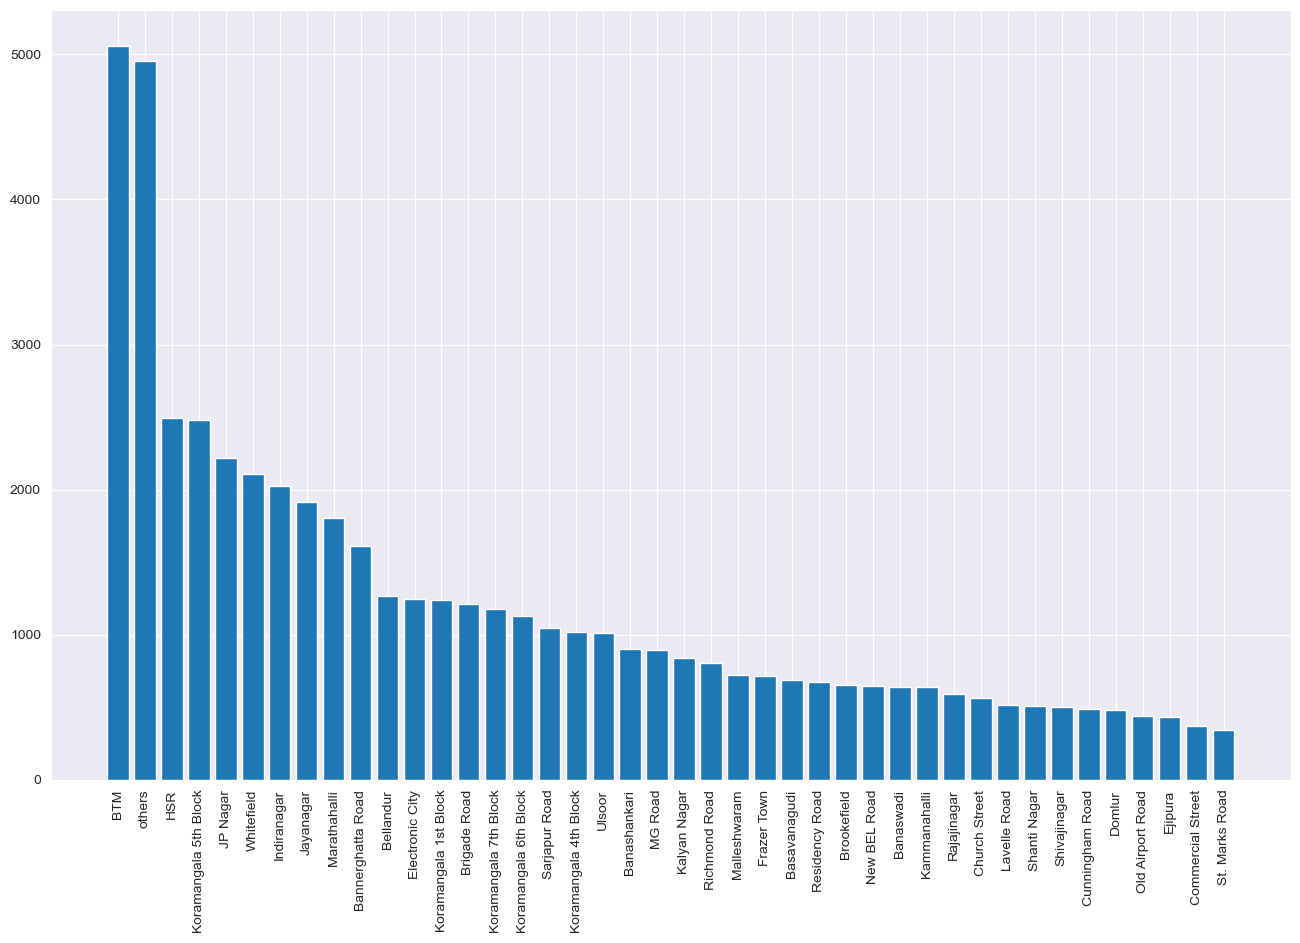

In [46]:
plt.figure(figsize=(16,10))
ax = plt.bar(df.location.value_counts().index,df.location.value_counts())
plt.xticks(rotation=90);

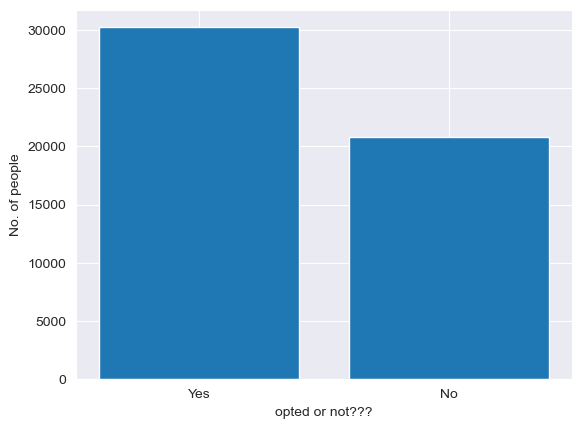

In [47]:
plt.bar(df['online_order'].value_counts().index,df['online_order'].value_counts())
plt.xlabel('opted or not???')
plt.ylabel('No. of people');

<Axes: xlabel='online_order', ylabel='rate'>

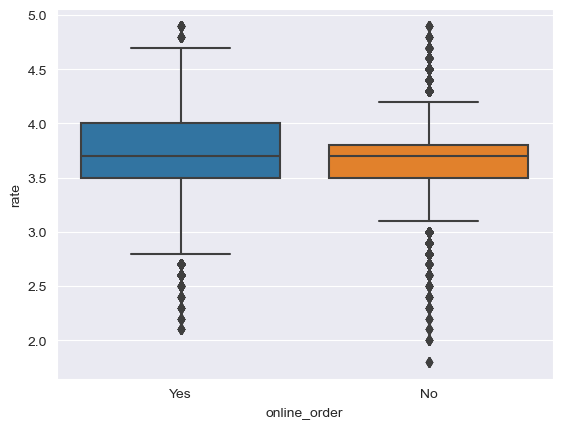

In [48]:
sns.boxplot(x='online_order',y='rate',data=df)

In [49]:
df1=df.groupby(['location','online_order']).size()
df1
df1.to_csv('graph.csv')
df2=pd.read_csv('graph.csv')
df2.rename(columns={'0':'Typess'},inplace=True)

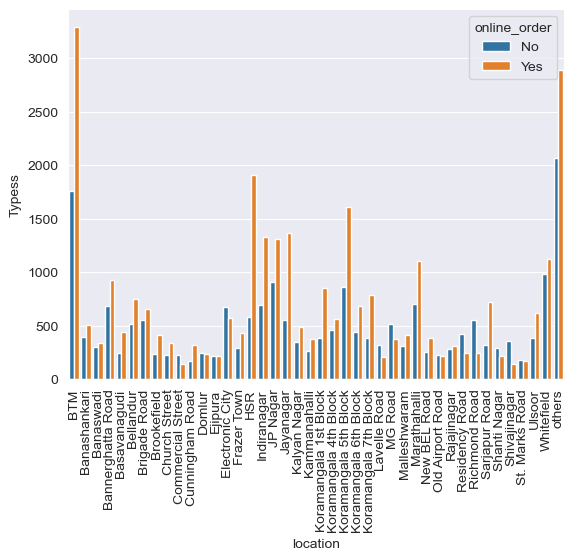

In [50]:
sns.barplot(x='location',y='Typess',hue='online_order',data=df2)
plt.xticks(rotation=90);

<Axes: xlabel='Type', ylabel='rate'>

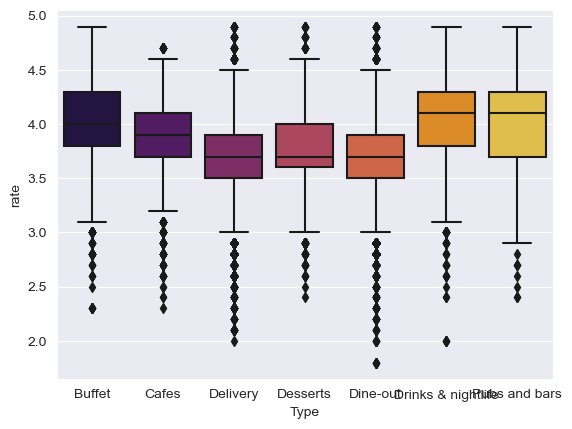

In [51]:
sns.boxplot(x='Type',y='rate',data= df, palette='inferno')

In [52]:
df3= df.groupby(['location','Type']).size()
df3.to_csv('location_graph.csv')
df3=pd.read_csv('location_graph.csv')
df3
df3.rename(columns={'0':'kuchbhi'},inplace=True)

In [53]:
df3

,location,Type,kuchbhi
0,BTM,Buffet,21
1,BTM,Cafes,83
2,BTM,Delivery,3053
3,BTM,Desserts,198
4,BTM,Dine-out,1660
...,...,...,...
275,others,Delivery,2787
276,others,Desserts,276
277,others,Dine-out,1553
278,others,Drinks & nightlife,75


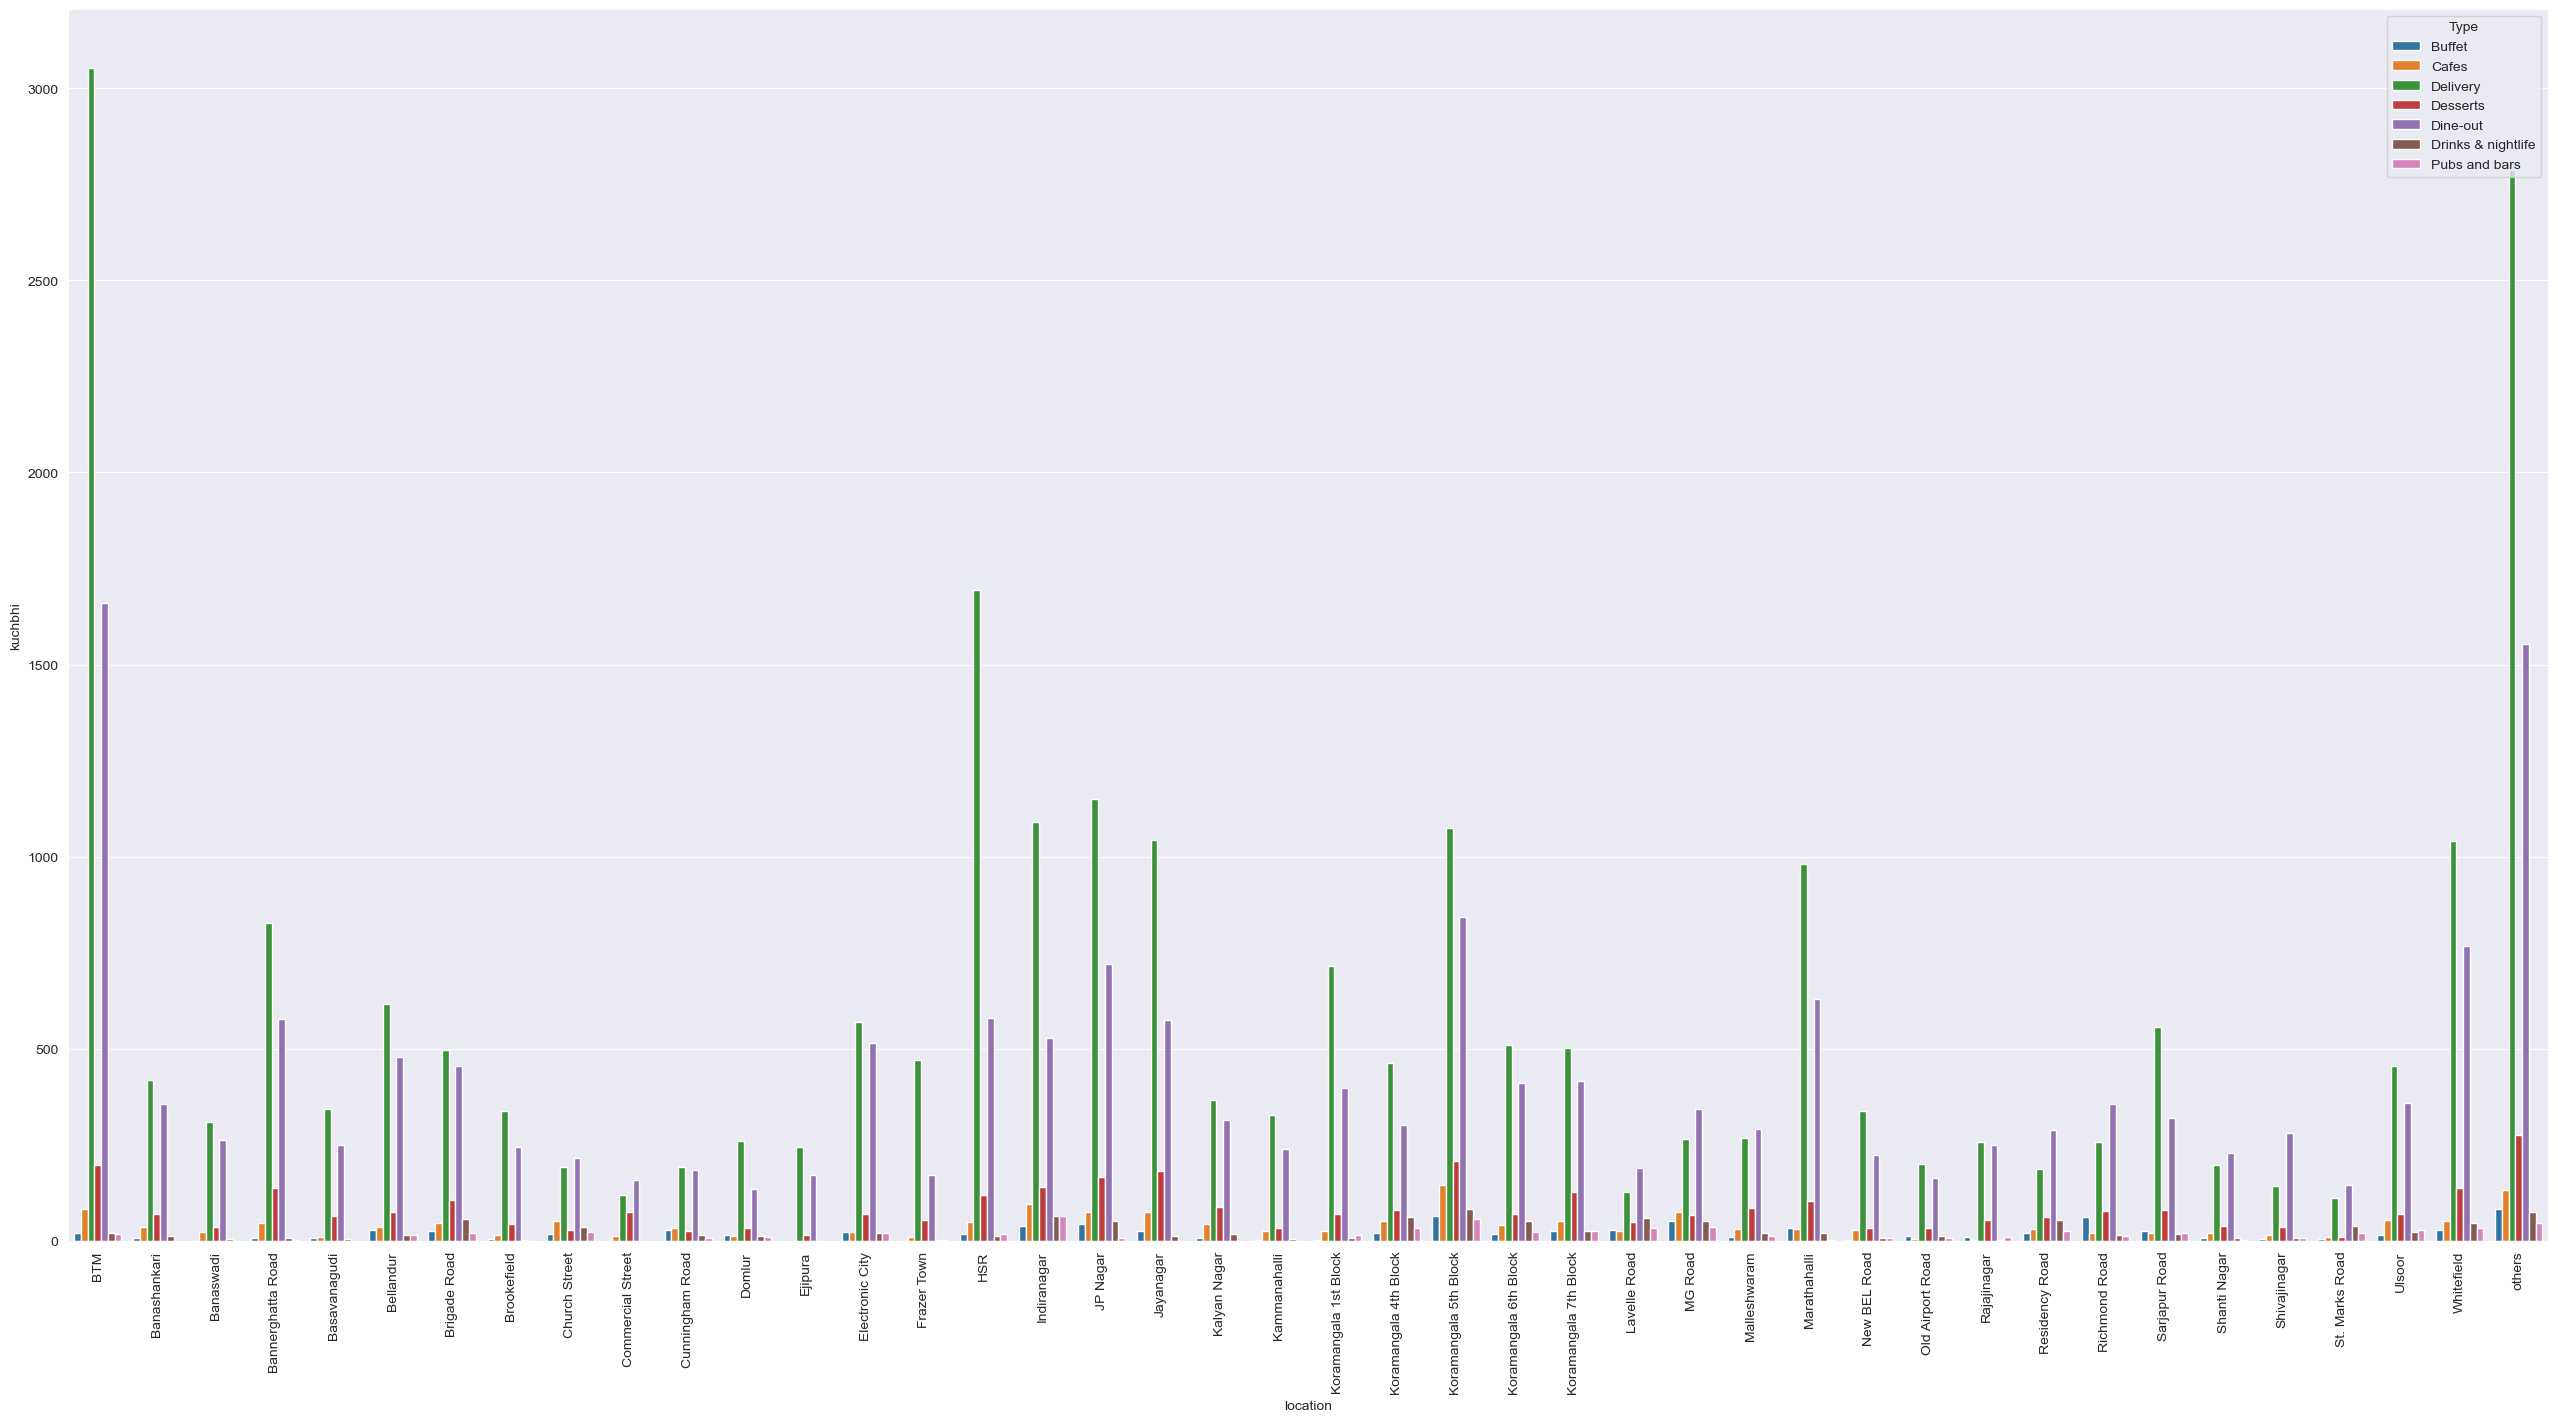

In [54]:
plt.figure(figsize=(32,16))
sns.barplot(x='location',y='kuchbhi',hue='Type',data=df3)
plt.xticks(rotation=90);

In [55]:
df4= df.groupby(['location'])['votes'].sum()
df4.to_csv('kuchbhii.csv')
df4=pd.read_csv('kuchbhii.csv')
df4

,location,votes
0,BTM,573668
1,Banashankari,162374
2,Banaswadi,34845
3,Bannerghatta Road,214989
4,Basavanagudi,94919
5,Bellandur,205308
6,Brigade Road,426682
7,Brookefield,118962
8,Church Street,590306
9,Commercial Street,25563


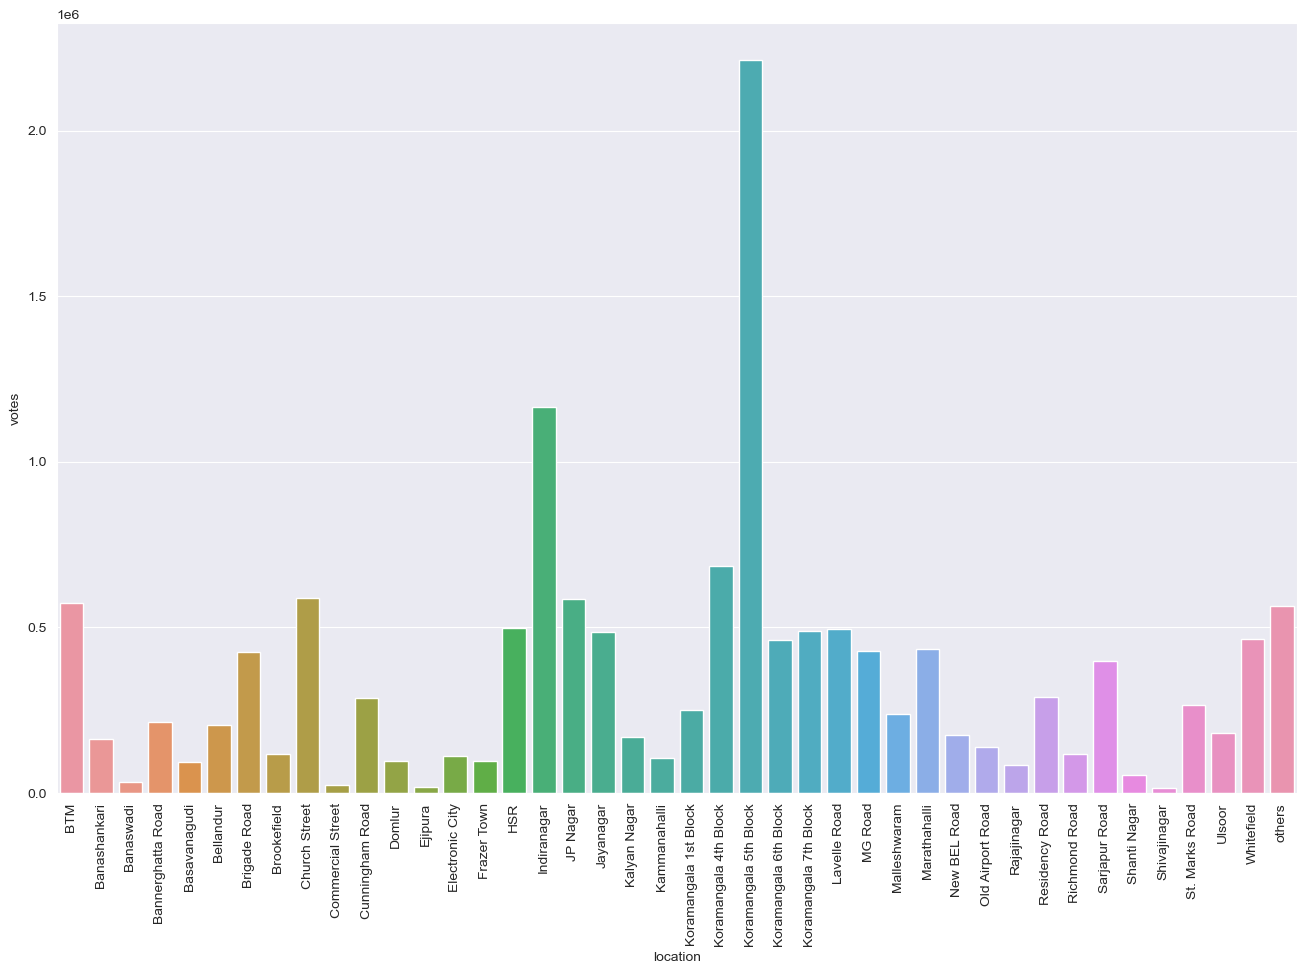

In [56]:
plt.figure(figsize=(16,10))
sns.barplot(x='location',y='votes',data=df4)
plt.xticks(rotation=90);

In [61]:
df5=df.groupby(['cuisines'])['votes'].sum()
df5.to_csv('xxx.csv')
df5=pd.read_csv('xxx.csv')
df5
df5=df5.iloc[:19]
df5


,cuisines,votes
0,Bakery,13148
1,"Bakery, Desserts",45464
2,Biryani,50607
3,Cafe,89986
4,Chinese,101728
5,"Chinese, North Indian",25040
6,Desserts,84323
7,"Desserts, Ice Cream",28972
8,Fast Food,26874
9,"Ice Cream, Desserts",66437


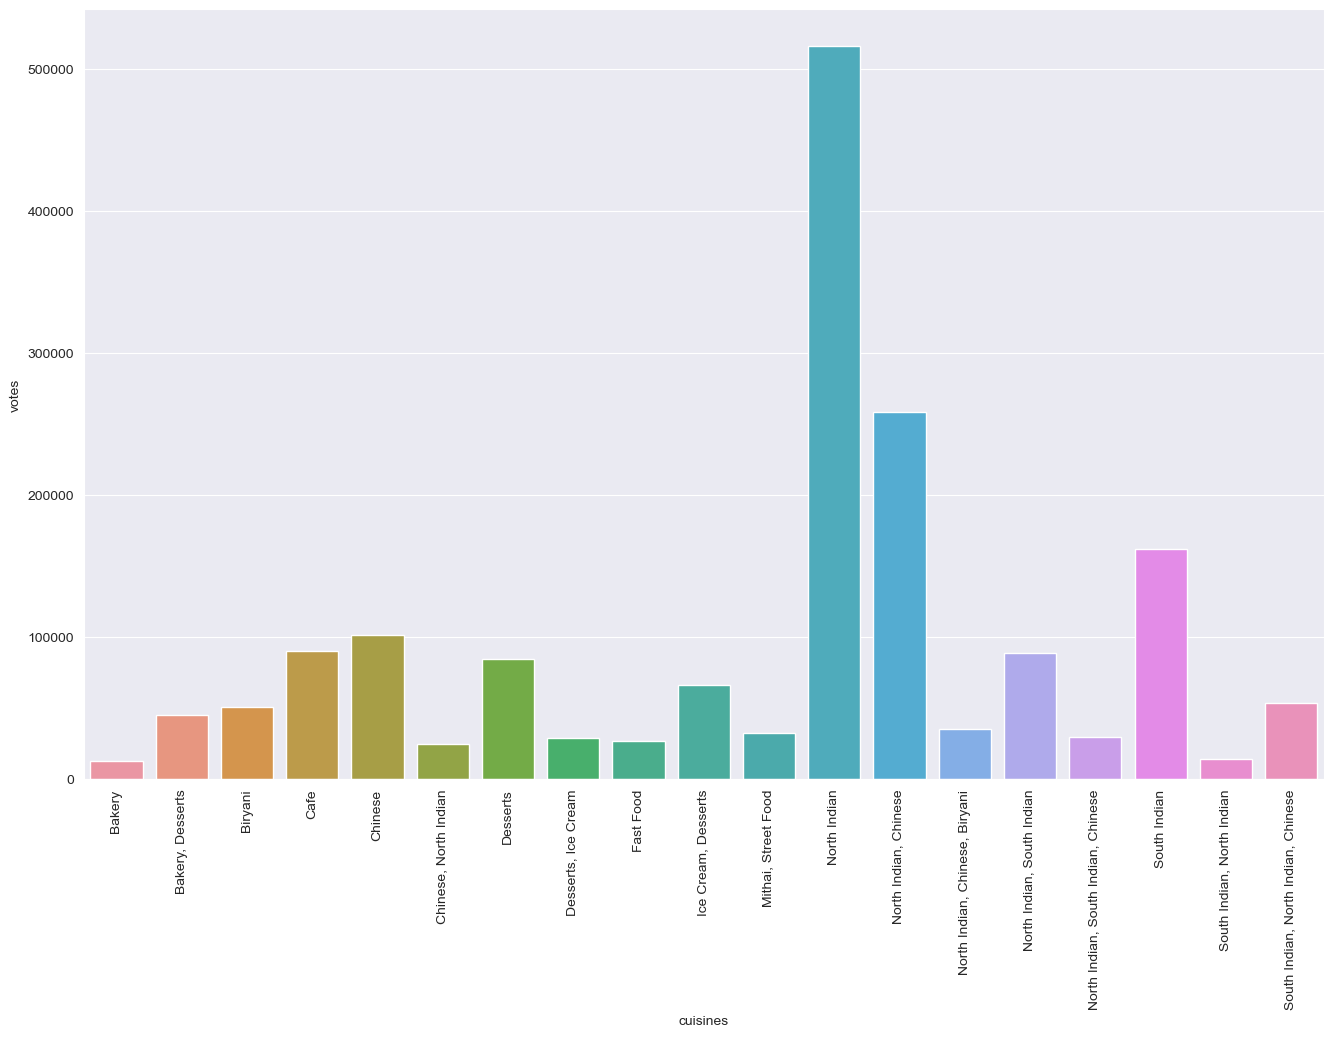

In [62]:
plt.figure(figsize=(16,10))
sns.barplot(x='cuisines',y='votes',data=df5)
plt.xticks(rotation=90);